# Trucated  SVD , 데이터 표준화 -->31개

Explained Variance up to Dimension 1: 0.10
market Total Contribution: 0.9892
country Total Contribution: 0.6538
reserved Total Contribution: 0.5692
arrival Total Contribution: 0.5223
distribution Total Contribution: 0.3096
deposit Total Contribution: 0.2770
adr Total Contribution: 0.2538
stays Total Contribution: 0.2287
total Total Contribution: 0.2226
customer Total Contribution: 0.1919
previous Total Contribution: 0.1663
adults Total Contribution: 0.1526
children Total Contribution: 0.1436
lead Total Contribution: 0.1180
is Total Contribution: 0.0983
A Total Contribution: 0.0920
days Total Contribution: 0.0860
meal Total Contribution: 0.0716
matching Total Contribution: 0.0479
required Total Contribution: 0.0410
babies Total Contribution: 0.0246
hotel Total Contribution: 0.0237
booking Total Contribution: 0.0159

Explained Variance up to Dimension 2: 0.16
distribution Total Contribution: 0.7987
market Total Contribution: 0.5227
lead Total Contribution: 0.3410
reserved Total Contribut

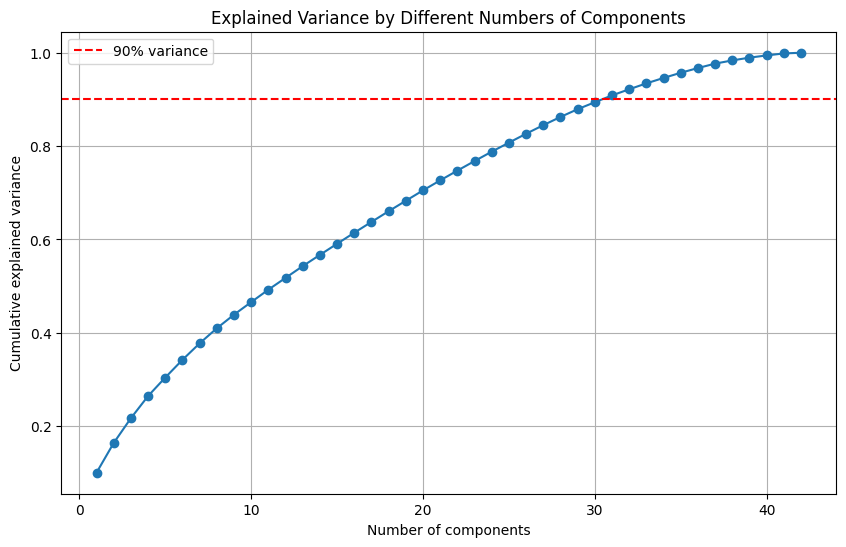

Optimal number of components: 31
Truncated SVD completed with optimal components.


In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import StandardScaler

# 1. CSV 파일 읽기
file_path = 'end_hotel_bookings.csv'  # 파일 경로를 입력하세요
data = pd.read_csv(file_path)

# 2. 데이터 준비
# feature와 label을 분리
X = data.drop('is_canceled', axis=1)
y = data['is_canceled']

# 데이터 표준화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# 3. Truncated SVD로 차원 축소 및 설명된 분산 비율 계산
n_components = X_scaled.shape[1]  # 피처 수 만큼 설정
svd = TruncatedSVD(n_components=n_components)

# 훈련 데이터에 맞춰 SVD 수행
X_svd = svd.fit_transform(X_scaled)

# 주성분 벡터의 가중치 확인
column_contributions = np.abs(svd.components_)

# 설명된 분산 비율 및 누적 설명된 분산 비율 계산
explained_var_ratio = svd.explained_variance_ratio_
cumulative_var_ratio = np.cumsum(explained_var_ratio)

# 기존에 사용한 X 데이터프레임에서 컬럼명 가져오기
original_columns = X.columns

# 각 컬럼의 설명력과 기여도 출력
for i, (explained_variance_ratio, column_contribution) in enumerate(zip(cumulative_var_ratio, column_contributions)):
    print(f"Explained Variance up to Dimension {i+1}: {explained_variance_ratio:.2f}")

    # 카테고리별 기여도 합산
    category_contributions = {}
    for col_name, contrib in zip(original_columns, column_contribution):
        category = col_name.split('_')[0]  # 예: 'market_segment_0'에서 'market_segment' 추출
        if category not in category_contributions:
            category_contributions[category] = 0
        category_contributions[category] += contrib

    # 정렬된 기여도를 기반으로 기여도 및 컬럼 이름 출력
    sorted_category_contributions = sorted(category_contributions.items(), key=lambda x: x[1], reverse=True)
    for category, contrib in sorted_category_contributions:
        print(f"{category} Total Contribution: {contrib:.4f}")
    print()

# 설명된 분산 비율 확인
explained_variance_ratio = svd.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# 4. 각 피처에 대한 설명된 분산 비율과 누적 설명된 분산 비율 출력
print("Component\tExplained Variance Ratio\tCumulative Explained Variance")
for i, (exp_var, cum_exp_var) in enumerate(zip(explained_variance_ratio, cumulative_explained_variance), start=1):
    print(f"{i}\t\t{exp_var:.4f}\t\t\t{cum_exp_var:.4f}")

# 5. 엘보우 포인트 찾기 위한 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.title('Explained Variance by Different Numbers of Components')
plt.axhline(y=0.90, color='r', linestyle='--', label='90% variance')
plt.legend()
plt.grid(True)
plt.show()

# 6. 최적 차원 수로 Truncated SVD 수행
min_components = 5
n_components_optimal = max(min_components, np.argmax(cumulative_explained_variance >= 0.90) + 1)
print(f"Optimal number of components: {n_components_optimal}")

# 최적 차원 수로 Truncated SVD 재수행
svd_optimal = TruncatedSVD(n_components=n_components_optimal)
X_svd_optimal = svd_optimal.fit_transform(X_scaled)
df_축소 = pd.DataFrame(X_svd_optimal)
df_축소['is_canceled'] = y
df_축소.to_csv('SVD_Standard.csv', index=False)


print("Truncated SVD completed with optimal components.")

In [19]:
print(X_scaled.shape)
print(X_svd_optimal.shape)

(117732, 42)
(117732, 31)


# 차원 축소된 데이터

In [20]:
df_축소 = pd.DataFrame(X_svd_optimal)
df_축소

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,-1.538264,2.450347,1.944073,0.359919,-0.087075,0.577603,1.652433,-1.663570,0.366259,-0.904739,...,-1.806516,-2.110647,0.016484,-0.606396,-1.541712,-0.385159,1.112553,1.498625,-3.570309,-0.326177
1,-1.948841,1.357769,2.879720,0.456121,-0.525847,1.255523,1.310722,-1.413361,0.575417,-0.778717,...,-2.739498,-2.826534,0.117108,-1.087962,-1.328153,-0.209253,0.958374,2.033678,-5.569942,0.309759
2,-1.406487,3.368846,-0.112735,0.339556,0.269954,0.409212,0.754541,-2.870270,-0.632632,-0.411374,...,-0.344172,0.860498,1.209759,-0.390086,-0.901426,1.231074,0.559500,-1.626249,-1.676913,0.052851
3,-2.405365,2.974000,-0.104892,0.387896,-1.134338,0.277391,-0.652634,-0.121764,0.061302,-0.805509,...,1.551168,-0.675918,1.351224,-2.063134,0.633078,0.718865,-0.966012,-0.038997,-1.103936,-0.677943
4,0.819757,0.105597,-0.426895,-0.195498,0.008986,-0.855966,-0.747421,-1.173910,-1.261344,-0.135839,...,0.377537,-0.004404,-0.373978,-1.463217,-0.082670,0.260708,0.302801,-0.154213,-0.984138,-0.993514
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117727,0.668216,-1.020608,0.195920,0.938909,-1.202767,-0.312873,-0.901677,-0.559371,0.544112,-0.623396,...,0.079818,0.662552,0.506326,0.677410,-0.109034,-0.475589,0.716002,-0.098835,0.819105,0.756786
117728,3.647551,-0.926670,1.170955,0.740558,-1.249822,-0.374093,0.326910,-0.001678,-0.046656,1.002018,...,-0.738076,-0.194856,-0.075778,-0.793771,1.583463,0.119577,-0.146863,-0.642077,0.969179,1.102734
117729,4.617213,-0.126791,0.646385,-0.017399,-1.729643,-0.090774,0.965401,0.865113,0.115628,0.570287,...,-0.351577,0.096375,-0.878954,-0.210007,0.738842,0.736196,-2.343712,-1.339248,0.720911,-0.413172
117730,1.332587,-0.990410,0.326195,0.846084,-1.168079,-0.349239,-0.982155,-1.001824,0.335592,-0.529368,...,0.050061,0.237523,0.572011,-1.209252,0.084603,-0.191933,1.025389,-0.644962,0.163800,0.260750


# Truncated SVD, Minmax --> 17개

Explained Variance up to Dimension 1: 0.06
arrival Total Contribution: 1.1894
market Total Contribution: 0.5413
country Total Contribution: 0.5202
reserved Total Contribution: 0.4441
distribution Total Contribution: 0.3780
matching Total Contribution: 0.3716
hotel Total Contribution: 0.2963
A Total Contribution: 0.1948
meal Total Contribution: 0.1428
customer Total Contribution: 0.1061
lead Total Contribution: 0.0615
deposit Total Contribution: 0.0523
stays Total Contribution: 0.0494
total Total Contribution: 0.0483
adults Total Contribution: 0.0140
is Total Contribution: 0.0102
adr Total Contribution: 0.0079
children Total Contribution: 0.0042
booking Total Contribution: 0.0041
required Total Contribution: 0.0027
days Total Contribution: 0.0026
previous Total Contribution: 0.0018
babies Total Contribution: 0.0003

Explained Variance up to Dimension 2: 0.21
market Total Contribution: 1.1906
country Total Contribution: 0.7783
arrival Total Contribution: 0.5697
reserved Total Contributio

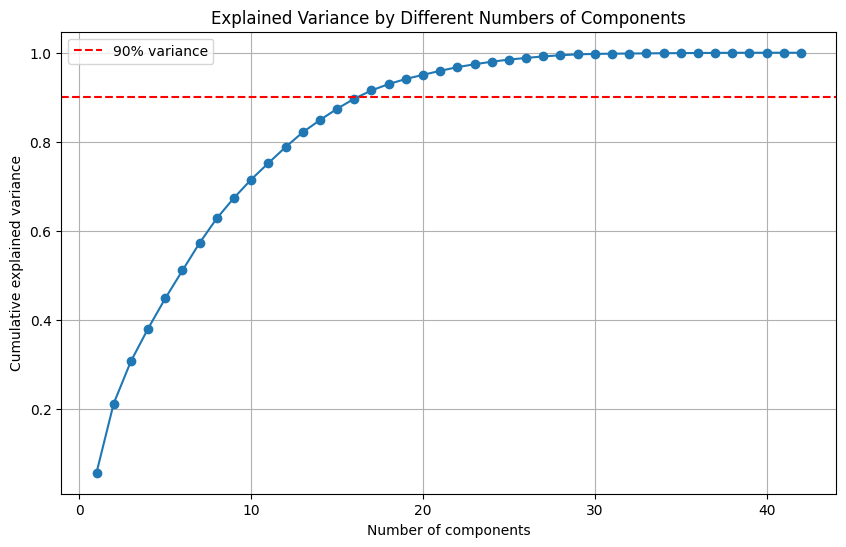

Optimal number of components: 17
Truncated SVD completed with optimal components.


In [30]:
from sklearn.preprocessing import MinMaxScaler

# 1. CSV 파일 읽기
file_path = 'end_hotel_bookings.csv'  # 파일 경로를 입력하세요
data = pd.read_csv(file_path)

# 2. 데이터 준비
# feature와 label을 분리
X = data.drop('is_canceled', axis=1)
y = data['is_canceled']

# 데이터 정규화
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)
X_normalized_df = pd.DataFrame(X_normalized, columns=X.columns)

# 3. Truncated SVD로 차원 축소 및 설명된 분산 비율 계산
n_components = X_normalized.shape[1]  # 피처 수 만큼 설정
svd = TruncatedSVD(n_components=n_components)

# 훈련 데이터에 맞춰 SVD 수행
X_svd = svd.fit_transform(X_normalized)

# 주성분 벡터의 가중치 확인
column_contributions = np.abs(svd.components_)

# 설명된 분산 비율 및 누적 설명된 분산 비율 계산
explained_var_ratio = svd.explained_variance_ratio_
cumulative_var_ratio = np.cumsum(explained_var_ratio)

# 기존에 사용한 X 데이터프레임에서 컬럼명 가져오기
original_columns = X.columns

# 각 컬럼의 설명력과 기여도 출력
for i, (explained_variance_ratio, column_contribution) in enumerate(zip(cumulative_var_ratio, column_contributions)):
    print(f"Explained Variance up to Dimension {i+1}: {explained_variance_ratio:.2f}")

    # 카테고리별 기여도 합산
    category_contributions = {}
    for col_name, contrib in zip(original_columns, column_contribution):
        category = col_name.split('_')[0]  # 예: 'market_segment_0'에서 'market_segment' 추출
        if category not in category_contributions:
            category_contributions[category] = 0
        category_contributions[category] += contrib

    # 정렬된 기여도를 기반으로 기여도 및 컬럼 이름 출력
    sorted_category_contributions = sorted(category_contributions.items(), key=lambda x: x[1], reverse=True)
    for category, contrib in sorted_category_contributions:
        print(f"{category} Total Contribution: {contrib:.4f}")
    print()

# 설명된 분산 비율 확인
explained_variance_ratio = svd.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# 4. 각 피처에 대한 설명된 분산 비율과 누적 설명된 분산 비율 출력
print("Component\tExplained Variance Ratio\tCumulative Explained Variance")
for i, (exp_var, cum_exp_var) in enumerate(zip(explained_variance_ratio, cumulative_explained_variance), start=1):
    print(f"{i}\t\t{exp_var:.4f}\t\t\t{cum_exp_var:.4f}")

# 5. 엘보우 포인트 찾기 위한 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.title('Explained Variance by Different Numbers of Components')
plt.axhline(y=0.90, color='r', linestyle='--', label='90% variance')
plt.legend()
plt.grid(True)
plt.show()

# 6. 최적 차원 수로 Truncated SVD 수행
min_components = 5
n_components_optimal = max(min_components, np.argmax(cumulative_explained_variance >= 0.90) + 1)
print(f"Optimal number of components: {n_components_optimal}")

# 최적 차원 수로 Truncated SVD 재수행
svd_optimal = TruncatedSVD(n_components=n_components_optimal)
X_svd_optimal = svd_optimal.fit_transform(X_normalized)
df_축소 = pd.DataFrame(X_svd_optimal)
df_축소['is_canceled'] = y
df_축소.to_csv('SVD_Minmax.csv', index=False)

print("Truncated SVD completed with optimal components.")

In [31]:
df_test = pd.read_csv('SVD_Standard.csv')